# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

In this section, we will introduce how to work with each of these types of date/time data in Pandas.
This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series.

## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans.
The time series tools provided by Pandas tend to be the most useful for data science applications and we will focus on those here.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Pretty as disp
hint = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/docs/hints/'  # path to hints on GitHub

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

,0
2014-07-04,0
2014-08-04,1
2015-07-04,2
2015-08-04,3


Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [ ]:
data['2014-07-04':'2015-07-04']

,0
2014-07-04,0
2014-08-04,1
2015-07-04,2


There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [ ]:
data['2015']

,0
2015-07-04,2
2015-08-04,3


Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

In [ ]:
dates = pd.to_datetime(['4th of July, 2019', '5th of July, 2019', '6th of July, 2019'])
dates

DatetimeIndex(['2019-07-04', '2019-07-05', '2019-07-06'], dtype='datetime64[ns]', freq=None)

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days'], dtype='timedelta64[ns]', freq=None)

## Resampling, Shifting, and Windowing

The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools.
The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example.
Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data.

Here we will load GOOG's history:

In [2]:
import yfinance as yf

# Define the ticker symbol
symbol = 'GOOGL'

# Get data on this ticker
tickerData = yf.Ticker(symbol)

# Get the historical prices for this ticker
tickerDF = tickerData.history(period='1d', start='2010-1-1')

tickerDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,15.650684,15.714591,15.583035,15.645692,78169752,0.0,0.0
2010-01-05 00:00:00-05:00,15.656427,15.672903,15.515634,15.576794,120067812,0.0,0.0
2010-01-06 00:00:00-05:00,15.623476,15.623476,15.136694,15.184124,158988852,0.0,0.0
2010-01-07 00:00:00-05:00,15.212581,15.227559,14.794448,14.830644,256315428,0.0,0.0
2010-01-08 00:00:00-05:00,14.778221,15.059057,14.706076,15.028353,188783028,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-27 00:00:00-04:00,162.809998,165.699997,162.630005,163.949997,21101300,0.0,0.0
2024-09-30 00:00:00-04:00,163.320007,166.149994,163.259995,165.850006,20413900,0.0,0.0
2024-10-01 00:00:00-04:00,167.690002,169.160004,164.580002,166.990005,28338100,0.0,0.0


In [ ]:
tickerDF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3712 entries, 2010-01-04 00:00:00-05:00 to 2024-10-02 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3712 non-null   float64
 1   High          3712 non-null   float64
 2   Low           3712 non-null   float64
 3   Close         3712 non-null   float64
 4   Volume        3712 non-null   int64  
 5   Dividends     3712 non-null   float64
 6   Stock Splits  3712 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 232.0 KB


Selecting a single Date:

In [ ]:
tickerDF.loc['2024-10-01']

,2024-10-01 00:00:00-04:00
Open,1.676900e+02
High,1.691600e+02
Low,1.645800e+02
Close,1.669900e+02
Volume,2.833810e+07
Dividends,0.000000e+00
Stock Splits,0.000000e+00


Or we could pass a column to extract the exact value we are looking for:

In [ ]:
tickerDF.loc['2024-10-01', 'Close']

166.99000549316406

We could also pass a higher level Datatime such as month and it will work like a filter:

In [ ]:
tickerDF.loc['2024-09']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-03 00:00:00-04:00,161.505697,161.635530,156.272635,157.151474,38945300,0.0,0.0
2024-09-04 00:00:00-04:00,156.452404,158.789300,155.753335,156.242676,19353800,0.0,0.0
2024-09-05 00:00:00-04:00,156.092875,159.238694,155.773291,157.031631,18688700,0.0,0.0
2024-09-06 00:00:00-04:00,157.091551,157.620848,150.350496,150.720001,37912100,0.0,0.0
2024-09-09 00:00:00-04:00,152.509995,153.399994,147.220001,148.710007,39260500,0.2,0.0
2024-09-10 00:00:00-04:00,150.449997,151.270004,148.339996,148.660004,31118800,0.0,0.0
2024-09-11 00:00:00-04:00,149.919998,151.500000,147.520004,151.160004,29607700,0.0,0.0
2024-09-12 00:00:00-04:00,153.800003,154.820007,152.649994,154.690002,29695000,0.0,0.0
2024-09-13 00:00:00-04:00,155.429993,158.380005,155.210007,157.460007,29591200,0.0,0.0


Pandas can parse out alternative formats, for instance:

In [ ]:
tickerDF.loc['Sep 2024']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-03 00:00:00-04:00,161.505697,161.635530,156.272635,157.151474,38945300,0.0,0.0
2024-09-04 00:00:00-04:00,156.452404,158.789300,155.753335,156.242676,19353800,0.0,0.0
2024-09-05 00:00:00-04:00,156.092875,159.238694,155.773291,157.031631,18688700,0.0,0.0
2024-09-06 00:00:00-04:00,157.091551,157.620848,150.350496,150.720001,37912100,0.0,0.0
2024-09-09 00:00:00-04:00,152.509995,153.399994,147.220001,148.710007,39260500,0.2,0.0
2024-09-10 00:00:00-04:00,150.449997,151.270004,148.339996,148.660004,31118800,0.0,0.0
2024-09-11 00:00:00-04:00,149.919998,151.500000,147.520004,151.160004,29607700,0.0,0.0
2024-09-12 00:00:00-04:00,153.800003,154.820007,152.649994,154.690002,29695000,0.0,0.0
2024-09-13 00:00:00-04:00,155.429993,158.380005,155.210007,157.460007,29591200,0.0,0.0


Slicing using Datatimes:

In [ ]:
tickerDF.loc['2024-09-30':'2024-10-03']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-30 00:00:00-04:00,163.320007,166.149994,163.259995,165.850006,20413900,0.0,0.0
2024-10-01 00:00:00-04:00,167.690002,169.160004,164.580002,166.990005,28338100,0.0,0.0
2024-10-02 00:00:00-04:00,166.419998,167.520004,164.729996,165.860001,17705100,0.0,0.0


# Resampling
One common need for time series data is resampling at a higher or lower frequency. This can be done using the `resample()` method. Statistical methods over different time intervals:
* `mean()`
* `sum()`
* `count()`

Down-sampling: reduce datetime rows to slower frequency. E.g., from daily to monthly

Up-sampling: increase datetime rows to faster frequency. E.g., from daily to hourly

Let's resample our `googl` DataFrame to get the monthly averages for the past years (down-sampling):

In [ ]:
tickerDF_subset = tickerDF.loc['2024-01-01':'2024-10-31']
tickerDF_subset.resample('ME').mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-31 00:00:00-05:00,143.180702,144.716897,142.126168,143.487085,2.766071e+07,0.000000,0.0
2024-02-29 00:00:00-05:00,142.483188,143.651796,140.996370,142.481197,3.238347e+07,0.000000,0.0
2024-03-31 00:00:00-04:00,142.022827,143.553535,140.718557,142.095646,3.363030e+07,0.000000,0.0
2024-04-30 00:00:00-04:00,156.458493,158.441765,154.933631,156.798558,2.997595e+07,0.000000,0.0
2024-05-31 00:00:00-04:00,170.934918,172.638427,169.637676,171.570164,2.465485e+07,0.000000,0.0
2024-06-30 00:00:00-04:00,177.060739,178.810681,175.807033,177.494924,2.426791e+07,0.010526,0.0
2024-07-31 00:00:00-04:00,180.867271,182.522801,178.891257,180.352954,2.391492e+07,0.000000,0.0
2024-08-31 00:00:00-04:00,163.370486,165.359666,161.656853,163.358231,2.503361e+07,0.000000,0.0
2024-09-30 00:00:00-04:00,158.763627,160.046219,156.894989,158.145290,2.663083e+07,0.010000,0.0


In the above code we have used 'ME' to resample monthly. Use the table below for more up-sampling and down-sampling options:

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |    ``  |                      |
| ``ME``  | Month end           | ``MS`` | Month start   |
| ``QE``  | Quarter end         | ``QS`` | Quarter start |
| ``YE``  | Year end            | ``YS`` | Year start    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |    ``  |                      |
| ``S``  | Seconds             |    ``  |                      |
| ``L``  | Milliseonds         |    ``  |                      |
| ``U``  | Microseconds        |    ``  |                      |
| ``N``  | nanoseconds         |    ``  |                      |

## Exercise 1

Up-sample the following subset by a daily scale, "D". Note that our current dataset is based on business days, and not daily.

In [5]:
data = tickerDF.loc['2024-09-21':'2024-10-05']
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-23 00:00:00-04:00,164.350006,165.490005,161.669998,161.850006,24150900,0.0,0.0
2024-09-24 00:00:00-04:00,163.029999,163.220001,160.690002,162.289993,23332100,0.0,0.0
2024-09-25 00:00:00-04:00,161.470001,162.809998,161.300003,161.490005,18869200,0.0,0.0
2024-09-26 00:00:00-04:00,163.639999,164.080002,162.279999,162.729996,20319300,0.0,0.0
2024-09-27 00:00:00-04:00,162.809998,165.699997,162.630005,163.949997,21101300,0.0,0.0
2024-09-30 00:00:00-04:00,163.320007,166.149994,163.259995,165.850006,20413900,0.0,0.0
2024-10-01 00:00:00-04:00,167.690002,169.160004,164.580002,166.990005,28338100,0.0,0.0
2024-10-02 00:00:00-04:00,166.419998,167.520004,164.729996,165.860001,17760200,0.0,0.0
2024-10-03 00:00:00-04:00,164.410004,166.639999,163.919998,165.860001,15021500,0.0,0.0


In [ ]:
# Your answer goes here


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-23 00:00:00-04:00,164.350006,165.490005,161.669998,161.850006,24150900.0,0.0,0.0
2024-09-24 00:00:00-04:00,163.029999,163.220001,160.690002,162.289993,23332100.0,0.0,0.0
2024-09-25 00:00:00-04:00,161.470001,162.809998,161.300003,161.490005,18869200.0,0.0,0.0
2024-09-26 00:00:00-04:00,163.639999,164.080002,162.279999,162.729996,20319300.0,0.0,0.0
2024-09-27 00:00:00-04:00,162.809998,165.699997,162.630005,163.949997,21101300.0,0.0,0.0
2024-09-28 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-29 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-30 00:00:00-04:00,163.320007,166.149994,163.259995,165.850006,20413900.0,0.0,0.0
2024-10-01 00:00:00-04:00,167.690002,169.160004,164.580002,166.990005,28338100.0,0.0,0.0


In [7]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex1-1.txt')

You notice that this has caused some NaN values due to the weekend. Use the forward fill method, `ffill()`, to fill the missing values by chaining it to the end of the aggregation:

In [ ]:
# Your answer goes here


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-23 00:00:00-04:00,164.350006,165.490005,161.669998,161.850006,24150900.0,0.0,0.0
2024-09-24 00:00:00-04:00,163.029999,163.220001,160.690002,162.289993,23332100.0,0.0,0.0
2024-09-25 00:00:00-04:00,161.470001,162.809998,161.300003,161.490005,18869200.0,0.0,0.0
2024-09-26 00:00:00-04:00,163.639999,164.080002,162.279999,162.729996,20319300.0,0.0,0.0
2024-09-27 00:00:00-04:00,162.809998,165.699997,162.630005,163.949997,21101300.0,0.0,0.0
2024-09-28 00:00:00-04:00,162.809998,165.699997,162.630005,163.949997,21101300.0,0.0,0.0
2024-09-29 00:00:00-04:00,162.809998,165.699997,162.630005,163.949997,21101300.0,0.0,0.0
2024-09-30 00:00:00-04:00,163.320007,166.149994,163.259995,165.850006,20413900.0,0.0,0.0
2024-10-01 00:00:00-04:00,167.690002,169.160004,164.580002,166.990005,28338100.0,0.0,0.0


In [9]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex1-2.txt')

The visualization below shows what different ways of filling NA in up-sampling will look like:

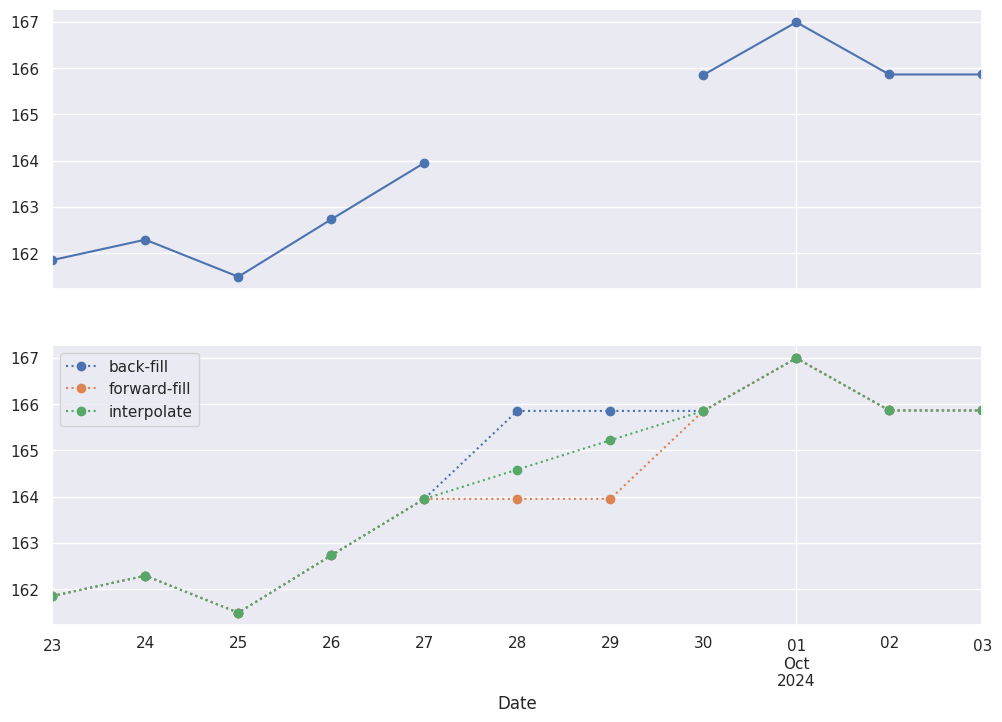

In [10]:
sns.set(rc={'figure.figsize':(12,8)})  # Figure size

fig, ax = plt.subplots(2, sharex=True)

data = data['Close']
data.resample('D').mean().plot(ax=ax[0], marker='o')

data.resample('D').bfill().plot(ax=ax[1], style=':o')
data.resample('D').ffill().plot(ax=ax[1], style=':o')
data.resample('D').interpolate().plot(ax=ax[1], style=':o')

ax[1].legend(["back-fill", "forward-fill", "interpolate"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot.

The bottom panel shows the differences between different strategies for filling the gaps: forward-filling, backward-filling, and interpolating.

## Exercise 2

Using the same DataFrame, can you generate a weekly aggregate for the month of September in 2024?

Hint: chain `.loc['2024-09']` to `tickerDF` DataFrame to get September 2024.

In [ ]:
# Your answer goes here


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-08 00:00:00-04:00,157.785632,159.321093,154.537440,155.286446,28724975.0,0.00,0.0
2024-09-15 00:00:00-04:00,152.421997,153.874002,150.188000,152.136005,31854640.0,0.04,0.0
2024-09-22 00:00:00-04:00,160.680002,161.363998,159.396002,160.584000,26051360.0,0.00,0.0
2024-09-29 00:00:00-04:00,163.060001,164.260001,161.714001,162.462000,21554560.0,0.00,0.0
2024-10-06 00:00:00-04:00,163.320007,166.149994,163.259995,165.850006,20413900.0,0.00,0.0


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex2-1.txt')

# Visualizing Time Series

For simplicity, we'll use just the closing price:

In [3]:
tickerDF_close = tickerDF['Close']

We can visualize this using the ``plot()`` method:

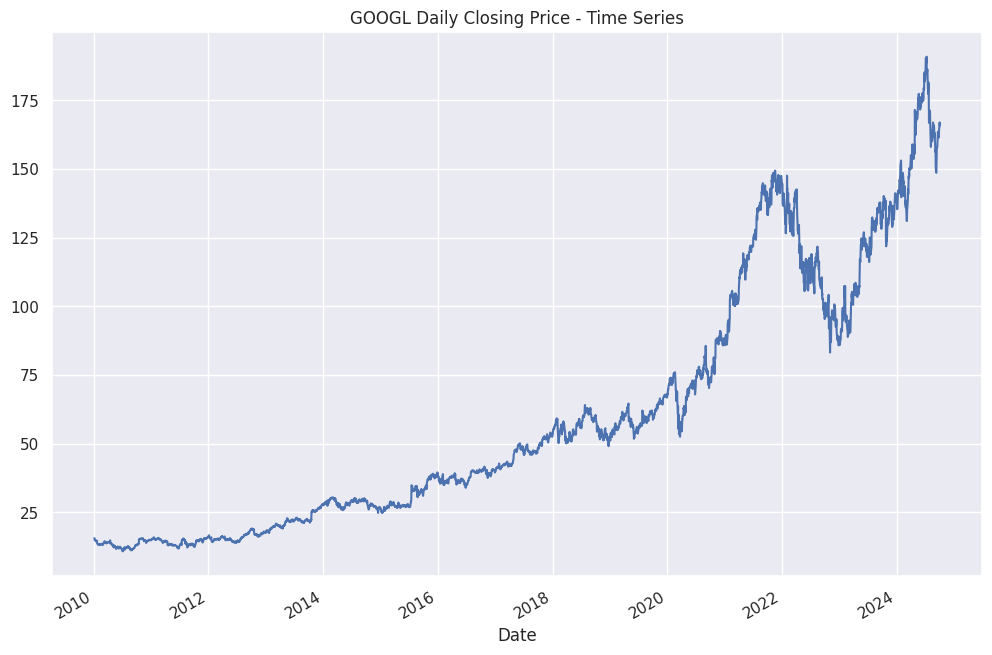

In [ ]:
tickerDF_close.plot()
plt.title(f'{symbol} Daily Closing Price - Time Series');

We can add an aggregated result using the `resample()` method:

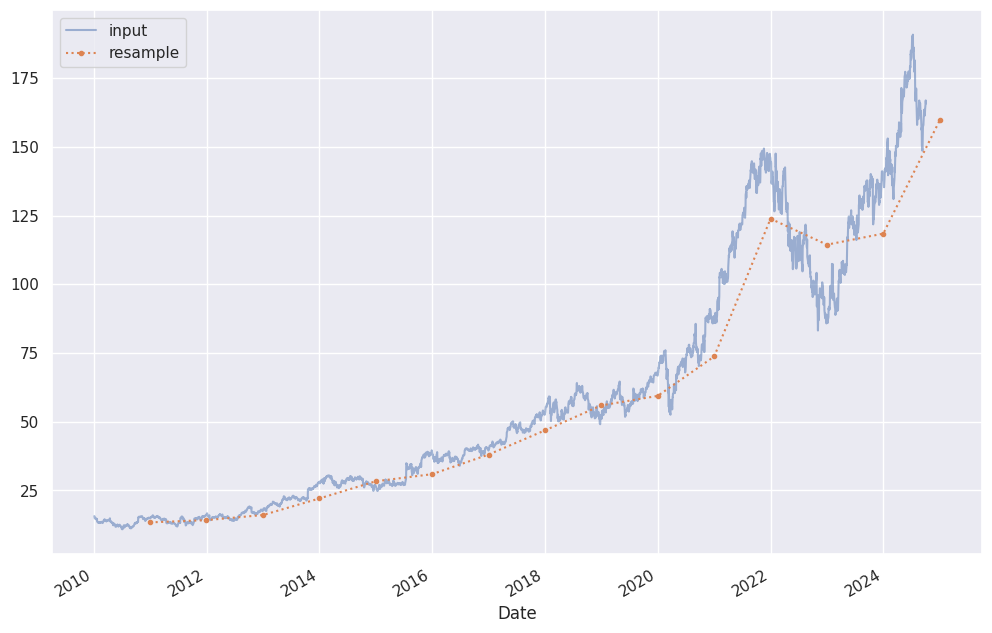

In [ ]:
tickerDF_close.plot(alpha=0.5, style='-')
tickerDF_close.resample('YE').mean().plot(style=':.')

plt.legend(['input', 'resample'], loc='upper left');

## Exercise 3

Redo the graph except for the last year only ('2023-10-01':'2024-10-01'). Instead of a Year end aggregation use a bi-weekly, "2W":

Hint: You can get a subset from `tickerDF_close` and save it to a new Series, or chain the subset to directly do the plotting.

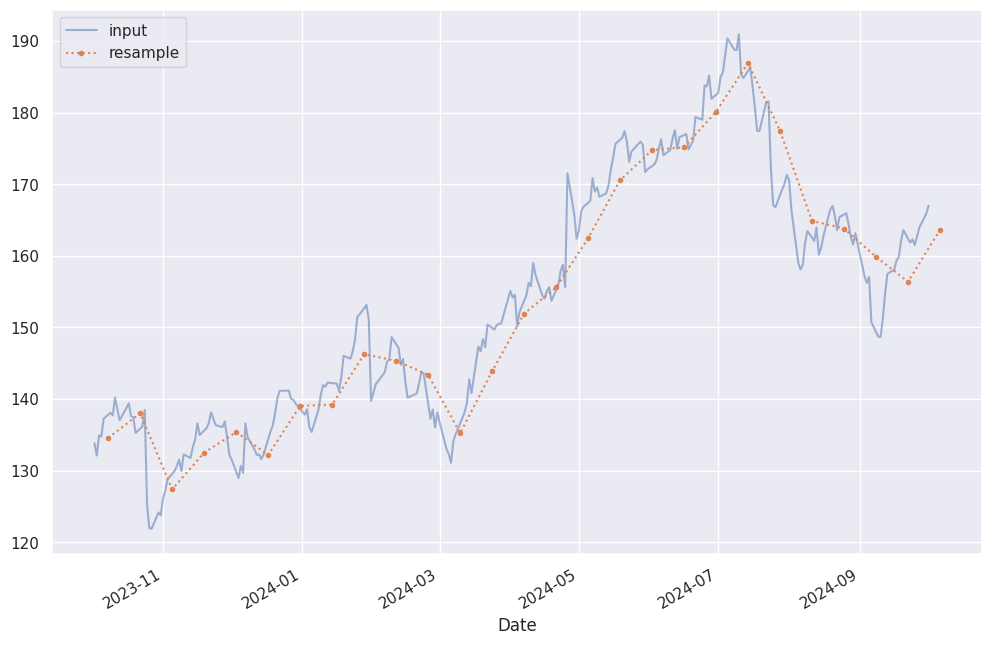

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex3-1.txt')

## Exercise 4

Plot the time series of the "Volume" field from `googl` DataFrame for the past 10 years. Use a "2Q" aggregation which stands for every two quarters.

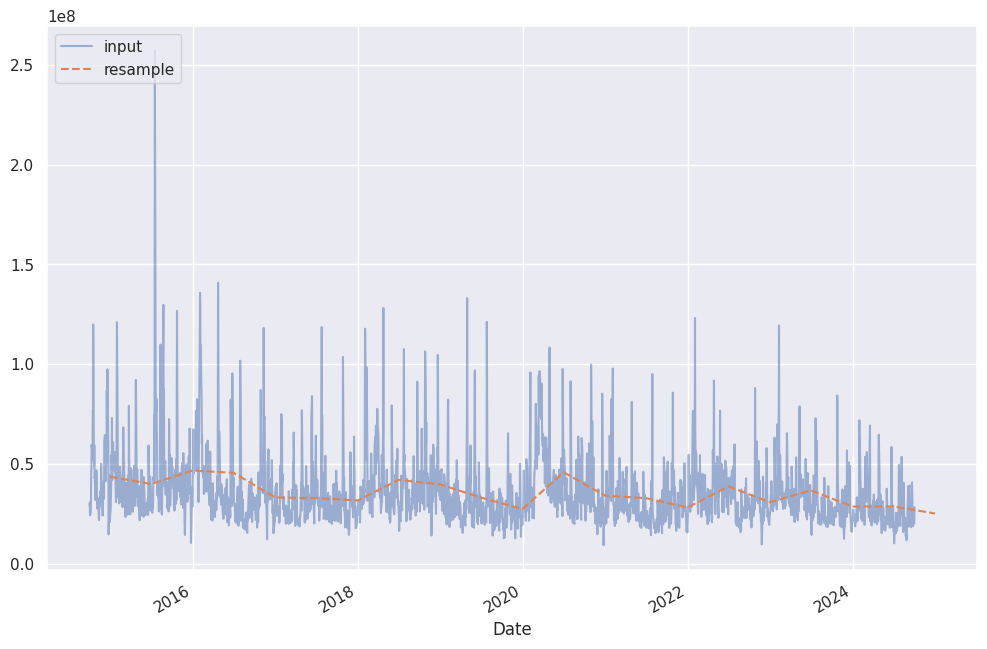

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex4-1.txt')

# Rolling windows

Rolling statistics are series-specific operation implemented by Pandas.

These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation.

This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

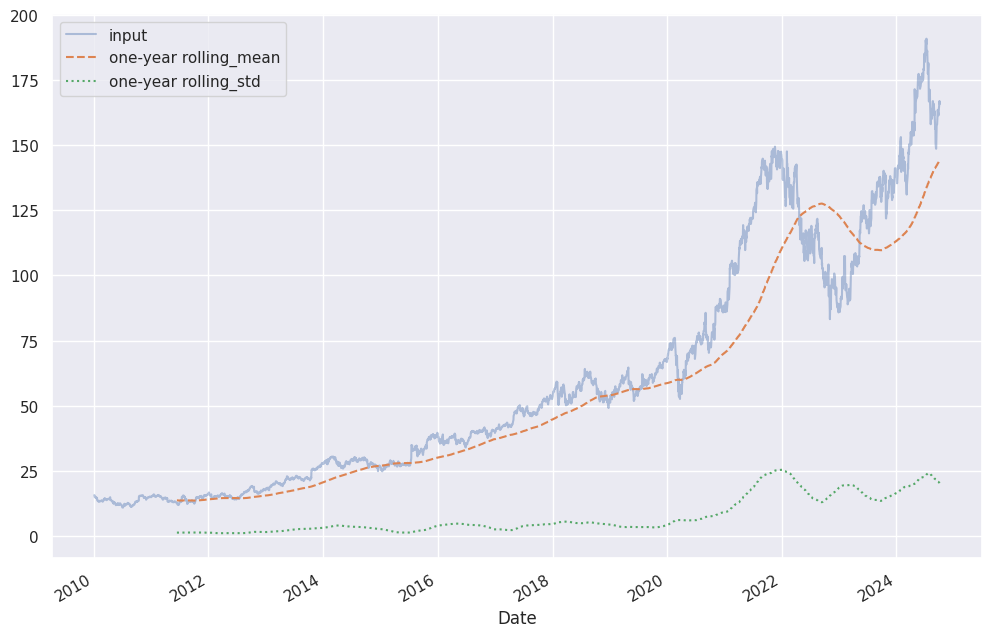

In [11]:
rolling = tickerDF_close.rolling(365, center=False)

tickerDF_close.plot(alpha=0.4, style='-')
rolling.mean().plot(style='--')
rolling.std().plot(style=':')

plt.legend(['input', 'one-year rolling_mean', 'one-year rolling_std'], loc='upper left');

## Exercise 5 - Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

The data was last downloaded in April 2019. We can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [ ]:
url = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/FremontBridge.csv'

data = pd.read_csv(url, parse_dates=True, index_col= 'Date')

print("There are {} rows and {} columns in this DataFrame.".format(data.shape[0], data.shape[1]))

<ipython-input-81-f34bdac37901>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(url, parse_dates=True, index_col= 'Date')


There are 56904 rows and 2 columns in this DataFrame.


In [ ]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


For convenience, we'll further process this dataset by shortening the column names:

In order to do this pass `['West', 'East']` to `data.columns` to overweite the existing column names:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-1.txt')

Add a "Total" column by adding `data['West']` and  `data['East']`:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-2.txt')

Now let's take a look at the summary statistics for this data:

In [ ]:
data.describe()

,West,East,Total
count,56895.000000,56895.000000,56895.000000
mean,51.972353,58.154478,110.126830
std,67.479946,84.679053,139.538643
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,59.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data by `data.plot()`.

Note that the following packages were already loaded at the top of this notebook:

```python
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
```

Can you add the `ylabel` to this plot?

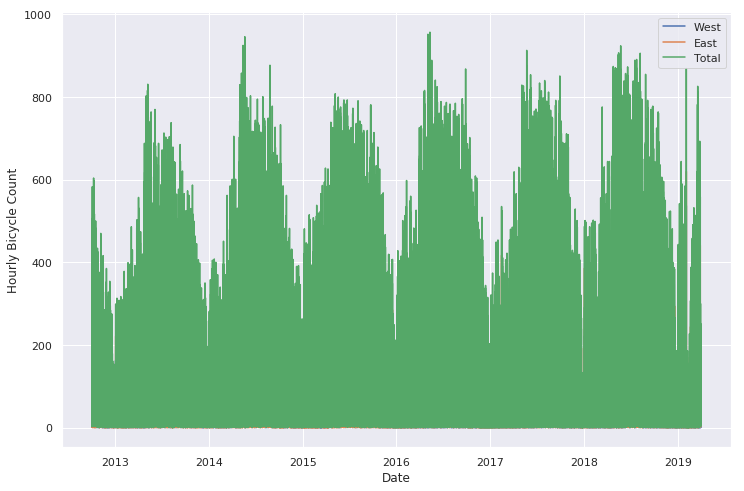

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-3.txt')

The ~57,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by week and call it `weekly`:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-4.txt')

In [ ]:
weekly.head()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


using `.plot()` on `weekly` plot the time series in this DataFrame. To make it cleaner use `style=[':', '--', '-']` argument for the `plot()` method to give the lines different shapes.

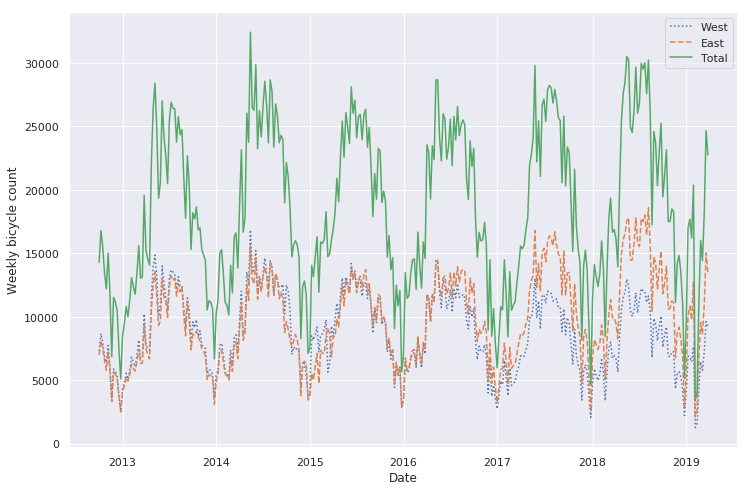

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-5.txt')

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling()`` function.

Using a 30-day rolling average, plot the daily number of bikes passing the bridge. Make sure to center the window:

1. Create a new DataFrame called `daily`. Use `resample()` to find the `sum()` for each day. Since we are interested in daily aggregates we need to use 'D'.
2. Create a new DataFrame called `rolling`. This DF is a 30-day rolling average of `daily` with the option `center=True`. Note that we want to chain function `mean()` to this rolling window.
3. Plot `rolling` DF. Like the chart above use different styles for different lines.
4. Add a `ylabel`

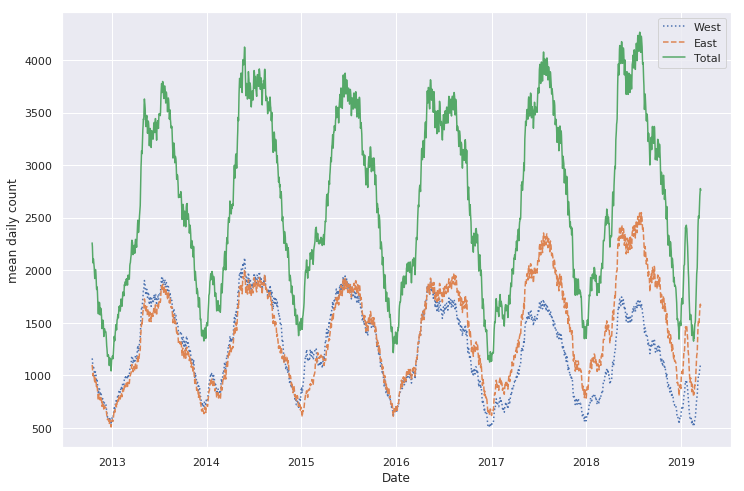

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-6.txt')

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

1. Repeat the steps above to create a new `rolling` DataFrame with a "gaussian" window type. You can do this by specifying `win_type='gaussian'` in `rolling()`.
2. gaussian method needs a `std`. Pass this to `mean()`: `std=10`.
3. Plot it

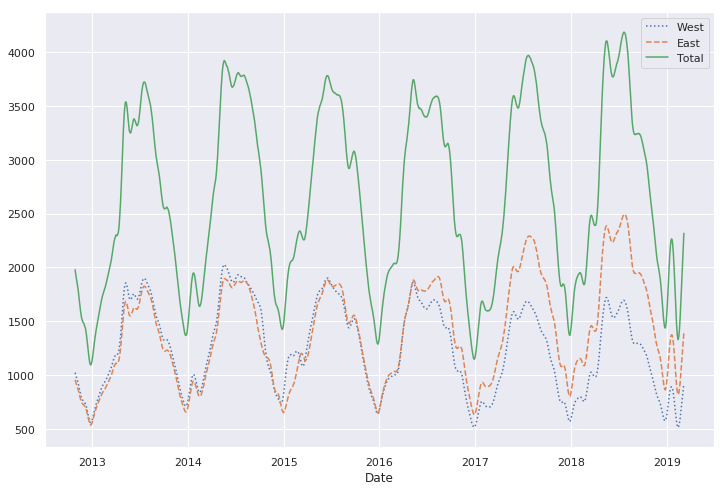

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-7.txt')

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality:

In [ ]:
by_time = data.groupby(data.index.time).mean()
by_time.head()

,West,East,Total
00:00:00,4.994517,6.638127,11.632644
01:00:00,2.781105,3.332771,6.113876
02:00:00,1.998309,2.082418,4.080727
03:00:00,1.563054,1.420498,2.983551
04:00:00,3.514973,3.042176,6.557149


Plot this `by_time` DF, using different line style. You can set the `xticks` to the values you like by passing something like `xticks=[0, 14400, 28800, 43200, 57600, 72000]` to `plot()`, which is the number of seconds representing the time we would like to show on the x axis:

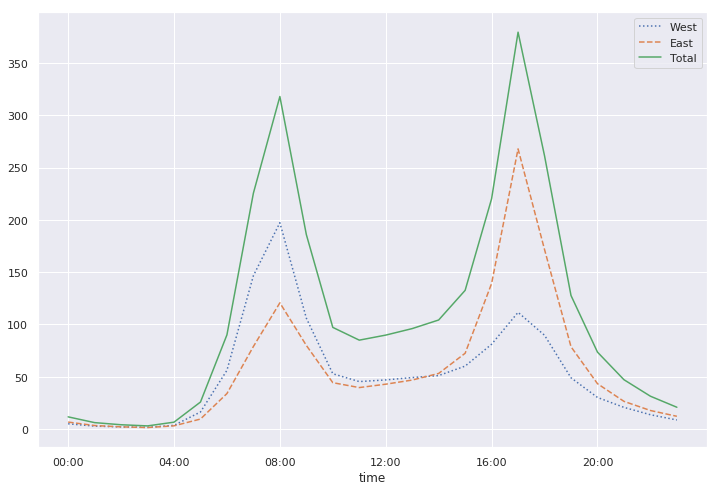

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-8.txt')

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

1. Like above create a new DataFrame (call it `by_weekday`) by a groupby. Use `data.index.dayofweek` for grouping.
2. Plot the time series
3. Print the DataFrame

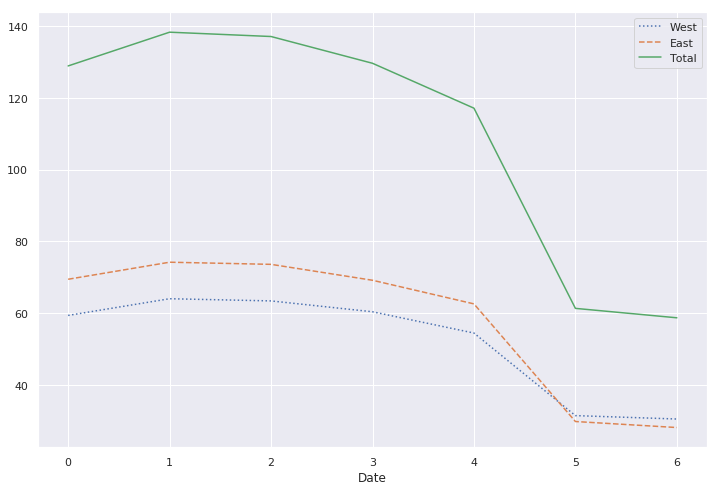

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-9.txt')

In [ ]:
# Your answer goes here


,West,East,Total
Date,,,
0,59.398176,69.470414,128.868590
1,64.049075,74.215783,138.264858
2,63.439282,73.620329,137.059612
3,60.417404,69.189528,129.606932
4,54.491271,62.611753,117.103024
5,31.504302,29.857670,61.361971
6,30.554913,28.183249,58.738163


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-10.txt')

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

Now we'll use some of the Matplotlib tools to plot two panels side by side:

1. First, use `fig, ax = plt.subplots(1, 2, figsize=(14, 5))` to specify the number of subplots in your chart
2. Seperately, for each of `by_time.loc['Weekday']` and `by_time.loc['Weekend']` plot their time series.
3. For each subplot provide an argument `ax`. This is the axes that will be used to draw that plot. For instance for one plot we will use `ax=ax[0]` and for the other one `ax=ax[1]`.
4. For each subplot provide an appropriate `title` inside `plot()`.
5. For each subplot specify the line style.
6. Use `xticks=[0, 14400, 28800, 43200, 57600, 72000]` to make the ticks look nicer.

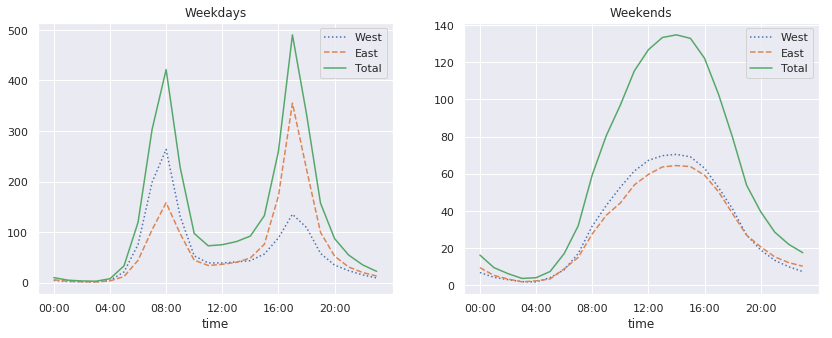

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '05-02-ex5-11.txt')

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see this blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.